In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load datasets

df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')

In [3]:
# Display basic info

df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------      

In [4]:
# Identify categorical columns (excluding 'flight')

categorical_columns = df_train.select_dtypes(include=['object']).columns.drop('flight')

In [5]:
# Print unique values for each categorical column in both datasets

for col in categorical_columns:
    print(f'{col}: {df_train[col].unique()}')
    print(f'{col}: {df_test[col].unique()}')

airline: ['Vistara' 'SpiceJet' 'Indigo' 'Air_India' 'GO_FIRST' 'AirAsia']
airline: ['Air_India' 'Vistara' 'AirAsia' 'Indigo' 'GO_FIRST' 'SpiceJet']
source_city: ['Bangalore' 'Hyderabad' 'Kolkata' 'Chennai' 'Delhi' 'Mumbai']
source_city: ['Kolkata' 'Delhi' 'Mumbai' 'Hyderabad' 'Bangalore' 'Chennai']
departure_time: ['Early_Morning' 'Evening' 'Morning' 'Afternoon' 'Night' 'Late_Night']
departure_time: ['Evening' 'Early_Morning' 'Night' 'Afternoon' 'Morning' 'Late_Night']
stops: ['one' 'zero' 'two_or_more']
stops: ['one' 'zero' 'two_or_more']
arrival_time: ['Night' 'Evening' 'Morning' 'Afternoon' 'Early_Morning' 'Late_Night']
arrival_time: ['Night' 'Early_Morning' 'Late_Night' 'Afternoon' 'Morning' 'Evening']
destination_city: ['Mumbai' 'Kolkata' 'Delhi' 'Hyderabad' 'Chennai' 'Bangalore']
destination_city: ['Delhi' 'Mumbai' 'Chennai' 'Kolkata' 'Hyderabad' 'Bangalore']
class: ['Economy' 'Business']
class: ['Business' 'Economy']


In [6]:
# Make copies to avoid modifying original datasets

train = df_train.copy()
test = df_test.copy()

In [7]:
# Label Encoding for categorical features

label_encoders = {}
for col in categorical_columns:
    unique_values = sorted(set(train[col].unique()).union(set(test[col].unique())))
    encoder = LabelEncoder()
    encoder.fit(unique_values)
    
    train[col] = encoder.transform(train[col])
    test[col] = encoder.transform(test[col])
    
    label_encoders[col] = encoder

In [8]:
# Drop 'flight' column as it is not useful for modeling

train.drop('flight', axis=1, inplace=True)
test.drop('flight', axis=1, inplace=True)

In [9]:
# Explore correlation

corr_matrix = train.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,id,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,1.000000,0.003641,0.005421,0.009564,0.001098,0.003382,0.002801,0.000039,0.000458,0.003195,0.002443
airline,0.003641,1.000000,0.017651,0.050009,0.030196,0.036642,0.035735,0.174770,0.008702,0.024465,0.241193
source_city,0.005421,0.017651,1.000000,0.006443,0.002982,0.037453,0.231524,0.007379,0.006542,0.003307,0.013570
departure_time,0.009564,0.050009,0.006443,1.000000,0.019553,0.040011,0.011299,0.057410,0.091432,0.006627,0.058520
stops,0.001098,0.030196,0.002982,0.019553,1.000000,0.007015,0.015075,0.096970,0.480818,0.023782,0.201309
arrival_time,0.003382,0.036642,0.037453,0.040011,0.007015,1.000000,0.031399,0.035101,0.011622,0.010408,0.046801
destination_city,0.002801,0.035735,0.231524,0.011299,0.015075,0.031399,1.000000,0.002545,0.012434,0.011963,0.008747
class,0.000039,0.174770,0.007379,0.057410,0.096970,0.035101,0.002545,1.000000,0.144831,0.022332,0.937868
duration,0.000458,0.008702,0.006542,0.091432,0.480818,0.011622,0.012434,0.144831,1.000000,0.020091,0.213158
days_left,0.003195,0.024465,0.003307,0.006627,0.023782,0.010408,0.011963,0.022332,0.020091,1.000000,0.102545


In [10]:
print(train.corrwith(train['price']).abs().sort_values(ascending=False))

price               1.000000
class               0.937868
airline             0.241193
duration            0.213158
stops               0.201309
days_left           0.102545
departure_time      0.058520
arrival_time        0.046801
source_city         0.013570
destination_city    0.008747
id                  0.002443
dtype: float64


In [11]:
# Define features and target variable

X = train.drop(columns=['id', 'price'])
y = train['price']

In [12]:
# Split data into train and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Train a Random Forest model

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# Make predictions and evaluate

preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error: 2066.365444690476
Mean Squared Error: 15484335.83217588
Root Mean Squared Error: 3935.0140828433996
R² Score: 0.9705125379177169


In [15]:
# Create a DataFrame to compare actual vs predicted values

results = pd.DataFrame({'Actual': y_test, 'Predicted': preds})
print(results.head())

       Actual  Predicted
10650    5361    6294.50
2041    50297   58565.47
8668    60232   60641.43
1114    74365   74901.64
13902    4417    5251.19


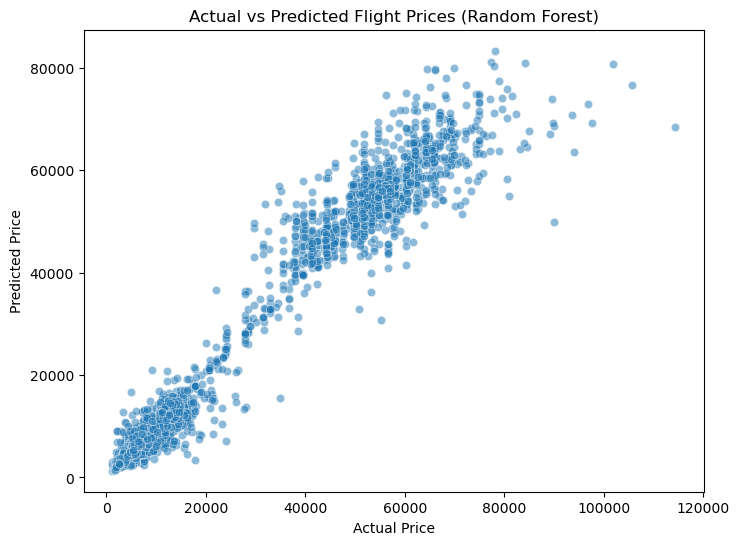

In [16]:
# Plot actual vs predicted prices in a scatter plot

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=preds, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Flight Prices (Random Forest)')
plt.show()

In [17]:
# Predict on test data

test_predictions = model.predict(test.drop(columns=['id']))

In [18]:
# Prepare solution file

solution = pd.DataFrame({'id': test['id'], 'price': test_predictions})
solution.to_csv('solution.csv', index=False)